In [3]:
# MAC
import ssl
ssl._create_default_https_context = ssl._create_unverified_context

In [5]:
from keras.datasets.mnist import load_data
#((x_train, y_train), (x_test, y_test))
(x_train, y_train), (x_test, y_test) = load_data()

In [6]:
print(x_train.shape)
print(x_test.shape)

(60000, 28, 28)
(10000, 28, 28)


6


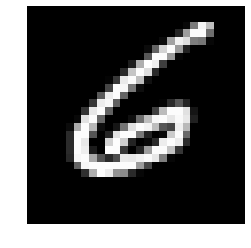

In [18]:
import matplotlib.pyplot as plt
%matplotlib inline
import random
c = random.randint(0, 59999)
print(y_train[c])
plt.axis("off")
plt.imshow(x_train[c], cmap="gray")

In [20]:
import pandas as pd
pd.DataFrame(x_train[c])

,0,1,2,3,4,5,6,7,8,9,...,18,19,20,21,22,23,24,25,26,27
0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,0,0,0,0,0,0,0,0,0,0,...,0,0,8,123,245,190,0,0,0,0
3,0,0,0,0,0,0,0,0,0,0,...,0,36,157,252,252,110,0,0,0,0
4,0,0,0,0,0,0,0,0,0,0,...,162,241,223,126,118,7,0,0,0,0
5,0,0,0,0,0,0,0,0,0,0,...,252,155,35,0,0,0,0,0,0,0
6,0,0,0,0,0,0,0,0,0,0,...,155,7,0,0,0,0,0,0,0,0
7,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
8,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
9,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [24]:
# 資料處理
# 1. 圖片部分 
# 把你圖轉成 0 - 1
# MLP的輸入必須是一維, 必須把她拉平
x_train_shape = x_train.reshape(60000, 784) / 255
x_test_shape = x_test.reshape(10000, 784) / 255

In [26]:
# 2. 答案部分
# 變成十個機率: 3 -> [0, 0, 0, 1, 0, 0, 0, 0, 0, 0]
from keras.utils.np_utils import to_categorical
y_train_cat = to_categorical(y_train)
y_test_cat = to_categorical(y_test)
print("處理前:", y_train[0])
print("處理後:", y_train_cat[0])

處理前: 5
處理後: [0. 0. 0. 0. 0. 1. 0. 0. 0. 0.]


In [27]:
# 1. 建立模型
from keras.models import Sequential
from keras.layers import Dense
mlp = Sequential()
#Param: 784 * 256 + 256(bias)
mlp.add(Dense(256, input_dim=784, activation="relu"))
#Param: 256 * 10 + 10(bias)
mlp.add(Dense(10, activation="softmax"))
mlp.summary()

_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_1 (Dense)              (None, 256)               200960    
_________________________________________________________________
dense_2 (Dense)              (None, 10)                2570      
Total params: 203,530
Trainable params: 203,530
Non-trainable params: 0
_________________________________________________________________


In [28]:
# 2. 確定你梯度下降所用的參數
# loss 一個神經元: binary_crossentropy 兩個以上神經元: categorical_crossentropy
# (補充) 回歸 神經元 acitvation不帶入, loss="mse"
mlp.compile(loss="categorical_crossentropy", optimizer="adam", metrics=["accuracy"])

In [31]:
# 3. 訓練!!!!
# batch_size: 看幾筆調整一次W
# epochs: 整個資料集總共看幾次
# batch = 200, epochs = 10: 60000 * 10 / 200 = 3000次梯度調整
# fit到什麼時候為止呢? val_loss開始平緩就停下來
mlp.fit(x_train_shape, y_train_cat, batch_size=200, epochs=15, validation_split=0.1, verbose=2)

Train on 54000 samples, validate on 6000 samples
Epoch 1/5
 - 1s - loss: 0.0206 - acc: 0.9953 - val_loss: 0.0647 - val_acc: 0.9810
Epoch 2/5
 - 1s - loss: 0.0164 - acc: 0.9966 - val_loss: 0.0687 - val_acc: 0.9800
Epoch 3/5
 - 1s - loss: 0.0145 - acc: 0.9973 - val_loss: 0.0675 - val_acc: 0.9813
Epoch 4/5
 - 1s - loss: 0.0123 - acc: 0.9979 - val_loss: 0.0691 - val_acc: 0.9815
Epoch 5/5
 - 1s - loss: 0.0100 - acc: 0.9983 - val_loss: 0.0677 - val_acc: 0.9823


In [32]:
mlp.predict_classes(x_test_shape)

array([7, 2, 1, ..., 4, 5, 6], dtype=int64)

In [33]:
# 不用再自己accuracy_score, 你可以使用evaluate
mlp.evaluate(x_test_shape, y_test_cat)

10000/10000 [==============================] - 0s 19us/step


[0.06923702055821196, 0.9803]

In [35]:
from sklearn.metrics import confusion_matrix
pre = mlp.predict_classes(x_test_shape)
pd.DataFrame(confusion_matrix(y_test, pre))

,0,1,2,3,4,5,6,7,8,9
0,971,0,1,1,1,0,2,1,3,0
1,0,1127,2,1,0,1,2,1,1,0
2,3,0,1013,3,1,0,1,3,7,1
3,0,0,3,993,0,3,0,3,4,4
4,1,0,3,1,967,0,1,2,0,7
5,3,0,0,4,1,874,4,2,4,0
6,4,2,2,1,8,4,936,0,1,0
7,1,4,9,2,0,0,0,1007,3,2
8,2,1,5,6,4,6,2,4,943,1
9,3,3,0,7,11,3,0,7,3,972


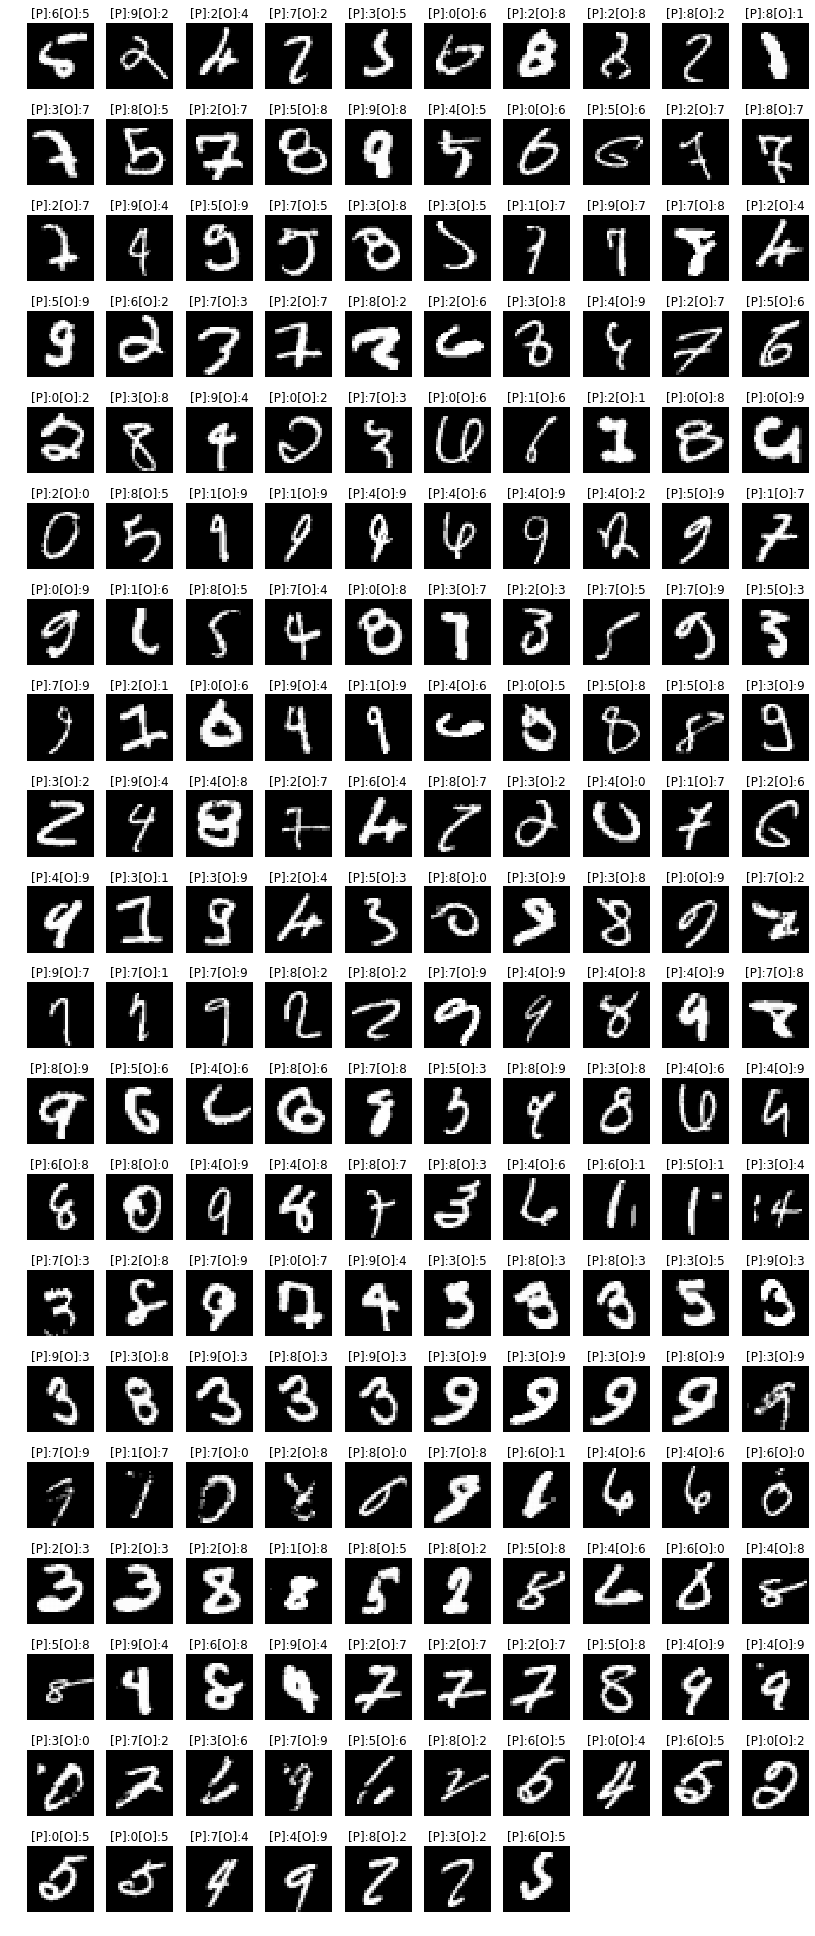

In [52]:
import numpy as np
idxs = np.nonzero(pre != y_test)[0]
# ["a", "b", "c"]
# for in : a -> b -> c
# for in enumerate : (0, a) -> (1, b) -> (2, c)
plt.figure(figsize=(14, 35))
width = 10
height = int(len(idxs) / width) + 1
falsepre = pre[idxs]
falseori = y_test[idxs]
for (i, img) in enumerate(x_test[idxs]):
    plt.subplot(height, width, i + 1)
    t = "[P]:" + str(falsepre[i]) + "[O]:" + str(falseori[i])
    plt.title(t)
    plt.axis("off")
    plt.imshow(img, cmap="gray")

In [47]:
print("預測錯誤標籤:", pre[idxs])
print("正確標籤:", y_test[idxs])

預測錯誤標籤: [6 9 2 7 3 0 2 2 8 8 3 8 2 5 9 4 0 5 2 8 2 9 5 7 3 3 1 9 7 2 5 6 7 2 8 2 3
 4 2 5 0 3 9 0 7 0 1 2 0 0 2 8 1 1 4 4 4 4 5 1 0 1 8 7 0 3 2 7 7 5 7 2 0 9
 1 4 0 5 5 3 3 9 4 2 6 8 3 4 1 2 4 3 3 2 5 8 3 3 0 7 9 7 7 8 8 7 4 4 4 7 8
 5 4 8 7 5 8 3 4 4 6 8 4 4 8 8 4 6 5 3 7 2 7 0 9 3 8 8 3 9 9 3 9 8 9 3 3 3
 8 3 7 1 7 2 8 7 6 4 4 6 2 2 2 1 8 8 5 4 6 4 5 9 6 9 2 2 2 5 4 4 3 7 3 7 5
 8 6 0 6 0 0 0 7 4 8 3 6]
正確標籤: [5 2 4 2 5 6 8 8 2 1 7 5 7 8 8 5 6 6 7 7 7 4 9 5 8 5 7 7 8 4 9 2 3 7 2 6 8
 9 7 6 2 8 4 2 3 6 6 1 8 9 0 5 9 9 9 6 9 2 9 7 9 6 5 4 8 7 3 5 9 3 9 1 6 4
 9 6 5 8 8 9 2 4 8 7 4 7 2 0 7 6 9 1 9 4 3 0 9 8 9 2 7 1 9 2 2 9 9 8 9 8 9
 6 6 6 8 3 9 8 6 9 8 0 9 8 7 3 6 1 1 4 3 8 9 7 4 5 3 3 5 3 3 8 3 3 3 9 9 9
 9 9 9 7 0 8 0 8 1 6 6 0 3 3 8 8 5 2 8 6 0 8 8 4 8 4 7 7 7 8 9 9 0 2 6 9 6
 2 5 4 5 2 5 5 4 9 2 2 5]


請輸入檔名:test4.png
預測結果: [7]


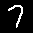

In [68]:
# 兩大圖像處理函式庫(PIL, opencv)
# PIL幫我安裝Pillow
# !!! 再用的時候所有東西都轉成np array
from PIL import Image
fn = input("請輸入檔名:")
f = open(fn, "rb")
oriimg = Image.open(f).convert("L")
img = oriimg.resize((28, 28))
img_shape = np.array(img).reshape(784) / 255
print("預測結果:", mlp.predict_classes(np.array([img_shape])))
oriimg